In [91]:
import numpy as np
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datafilereader import DataFileReader
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

folder = "./dataset"

labels = ["unknown", "5_CTS", "10_CTS", "20_CTS", "50_CTS", "1_CHF", "2_CHF", "5_CHF"]

In [92]:
#load the training set
with open('dataset/trainingset.pkl', 'rb') as f:
    X, Y = pickle.load(f)

In [93]:
#train the SVM model using sikit-learn library
nu = 0.001
clf = svm.OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
model = clf.fit(X)

#save the model
with open("data/Tests/modelOneVsAll.pkl","wb+") as f:
    pickle.dump(model, f)

In [103]:
#test prediction with validation set
#load the validation set
with open('dataset/validset_foreign.pkl', 'rb') as f:
    X_valid, Y_valid = pickle.load(f)


Y_pred = model.predict(X_valid)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        28
        True       1.00      1.00      1.00        32

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[28  0]
 [ 0 32]]


<Figure size 640x480 with 0 Axes>

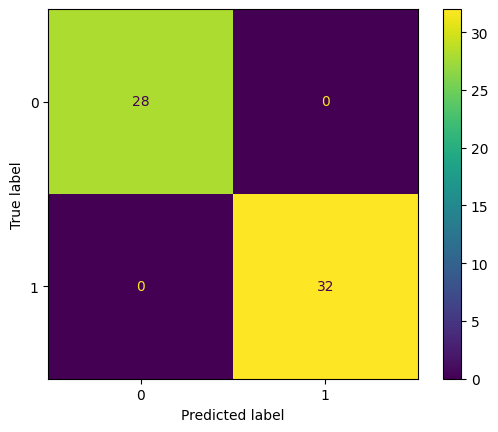

In [104]:

#results
accuracy = accuracy_score(Y_valid, Y_pred)
print(f"Accuracy: {accuracy}")

#classification report
report = classification_report(Y_valid, Y_pred)
print("Classification Report:\n", report)

#confusion matrix
conf_matrix = confusion_matrix(Y_valid, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure()
ConfusionMatrixDisplay(conf_matrix).plot()

Accuracy: 0.9933774834437086
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        28
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        30

    accuracy                           0.99       151
   macro avg       0.99      0.99      0.99       151
weighted avg       0.99      0.99      0.99       151

Confusion Matrix:
 [[18  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0 19  0  0  0  0]
 [ 0  0  0 28  0  0  0]
 [ 0  1  0  0 18  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 30]]


<Figure size 640x480 with 0 Axes>

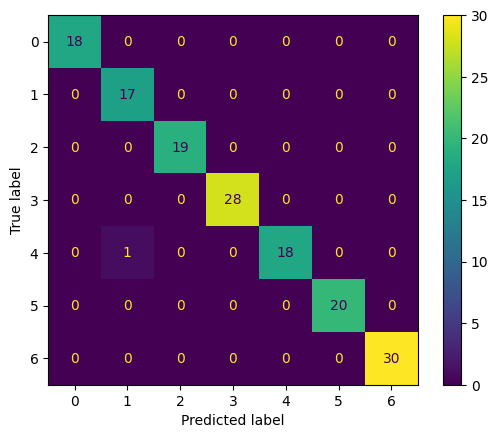

In [96]:
#model prediction with the validationset

with open('dataset/validationset.pkl', 'rb') as f:
    X_valid, Y_valid = pickle.load(f)
Y_pred = model.predict(X_valid)

#results
accuracy = accuracy_score(Y_valid, Y_pred)
print(f"Accuracy: {accuracy}")

#classification report
report = classification_report(Y_valid, Y_pred)
print("Classification Report:\n", report)

#confusion matrix
conf_matrix = confusion_matrix(Y_valid, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure()
ConfusionMatrixDisplay(conf_matrix).plot()